In [1]:
import tensorflow as tf
a = tf.Variable(1,name = "a" )
b = tf.Variable(2,name = "b" )

f = a + b 
tf.print("the sum of a and b is", f)

the sum of a and b is 3


# hand write recognition

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [3]:
num_classes = 10
num_features = 784
#parameters
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#convert to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
#reshape to a vector that 1*784
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# x_test.shape
#normalize data wich our data is between 0-255 we scale it to 0-1
x_train, x_test = x_train/255., x_test/255.

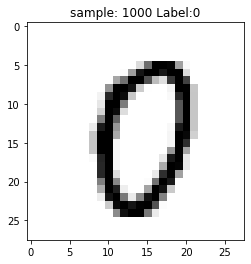

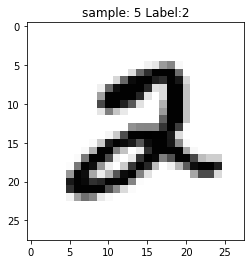

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def display_sample(num):
    label = y_train[num]
    
    image = x_train[num].reshape([28, 28])
    plt.title('sample: %d Label:%d'%(num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1000)
display_sample(5)


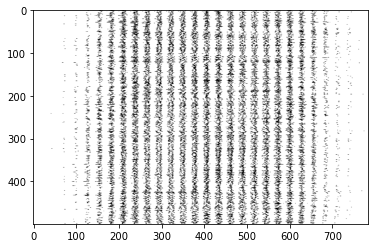

In [5]:
images = x_train[0].reshape([1,784])
for i in range(1,500):
    images = np.concatenate((images, x_train[i].reshape([1, 784])))
plt.imshow(images, cmap = plt.get_cmap('gray_r'))
plt.show()

In [6]:
learning_rate = 0.001
training_steps = 3000
batch_size = 250
display_step = 100

n_hidden = 512

In [7]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(60000).batch(batch_size).prefetch(1)

In [8]:
random_normal = tf.initializers.RandomNormal()

weight = {
    'h': tf.Variable(random_normal([num_features, n_hidden])),
    'out': tf.Variable(random_normal([n_hidden, num_classes]))
}

bias = {
    'b': tf.Variable(tf.zeros([n_hidden])),
    'out': tf.Variable(tf.zeros([num_classes]))
}


In [14]:
def neural_net(inputData):
    hidden_layer = tf.add(tf.matmul(inputData, weight['h']),bias['b'])
    hidden_layer = tf.nn.sigmoid(hidden_layer)
    
    output_layer = tf.matmul(hidden_layer, weight['out'])+ bias['out']
    return tf.nn.softmax(output_layer)

In [15]:
def croos_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pre = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [16]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = croos_entropy(pred, y)
   #append 2 list     
    trainable_variables = list(weight.values()) + list(bias.values())
    
    gradients = g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables) )

In [17]:
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis= -1)

In [18]:
#run training for he given number of steps
for step,(batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    #run the optimizer to update W and b values
    run_optimization(batch_x,batch_y)
    
    if step % display_step ==0  :
        pred = neural_net(batch_x)
        loss = croos_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("Training epoch:%i, loss:%f, Accuracy:%f"%(step, loss,acc))
        

Training epoch:100, loss:171.420898, Accuracy:0.816000
Training epoch:200, loss:131.051453, Accuracy:0.852000
Training epoch:300, loss:91.337540, Accuracy:0.916000
Training epoch:400, loss:74.530533, Accuracy:0.916000
Training epoch:500, loss:97.399124, Accuracy:0.880000
Training epoch:600, loss:99.291779, Accuracy:0.884000
Training epoch:700, loss:86.159225, Accuracy:0.916000
Training epoch:800, loss:102.762871, Accuracy:0.896000
Training epoch:900, loss:69.897980, Accuracy:0.936000
Training epoch:1000, loss:78.276840, Accuracy:0.912000
Training epoch:1100, loss:58.789116, Accuracy:0.928000
Training epoch:1200, loss:119.152527, Accuracy:0.860000
Training epoch:1300, loss:86.994141, Accuracy:0.904000
Training epoch:1400, loss:65.413315, Accuracy:0.908000
Training epoch:1500, loss:68.795059, Accuracy:0.928000
Training epoch:1600, loss:58.950356, Accuracy:0.940000
Training epoch:1700, loss:63.950806, Accuracy:0.912000
Training epoch:1800, loss:80.096794, Accuracy:0.904000
Training epoch:

In [21]:
pred = neural_net(x_test)
print("test accuracy: %f"%accuracy(pred,y_test))

test accuracy: 0.929700


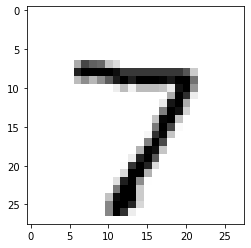

Orginal label:7
Model prediction:2


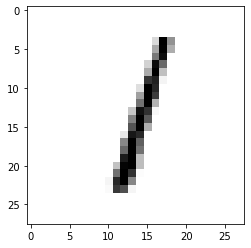

Orginal label:1
Model prediction:2


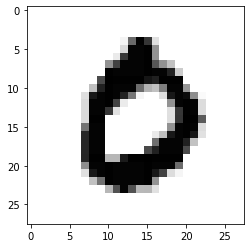

Orginal label:0
Model prediction:2


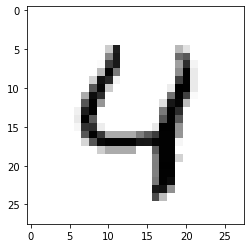

Orginal label:4
Model prediction:2


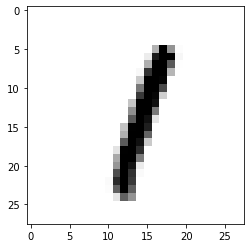

Orginal label:1
Model prediction:2


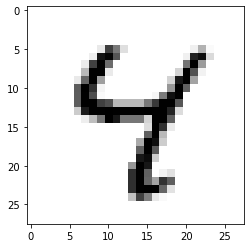

Orginal label:4
Model prediction:2


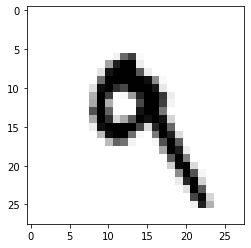

Orginal label:9
Model prediction:2


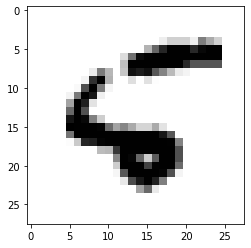

Orginal label:5
Model prediction:2


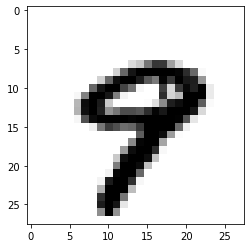

Orginal label:9
Model prediction:2


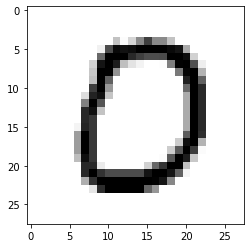

Orginal label:0
Model prediction:2


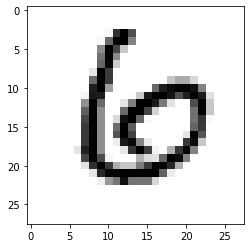

Orginal label:6
Model prediction:2


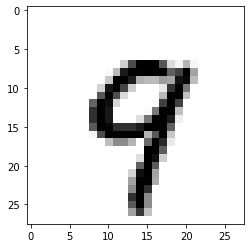

Orginal label:9
Model prediction:2


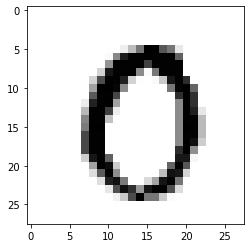

Orginal label:0
Model prediction:2


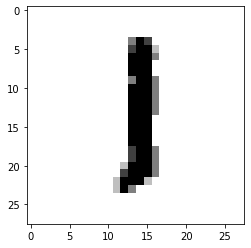

Orginal label:1
Model prediction:2


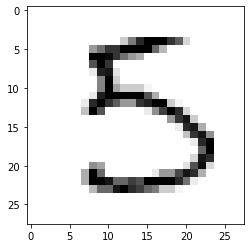

Orginal label:5
Model prediction:2


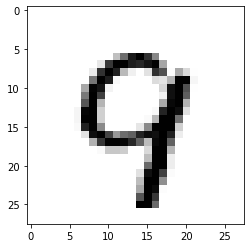

Orginal label:9
Model prediction:2


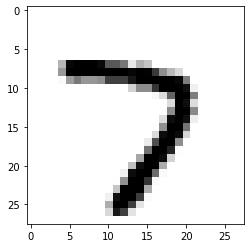

Orginal label:7
Model prediction:2


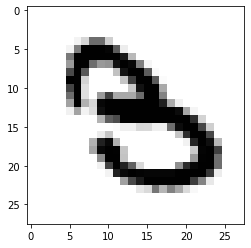

Orginal label:3
Model prediction:2


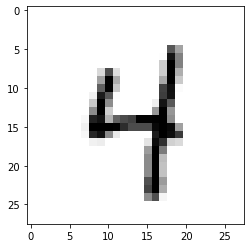

Orginal label:4
Model prediction:2


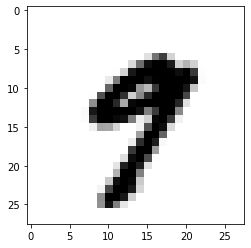

Orginal label:9
Model prediction:2


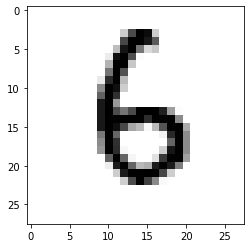

Orginal label:6
Model prediction:2


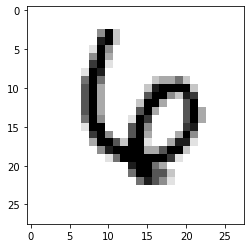

Orginal label:6
Model prediction:2


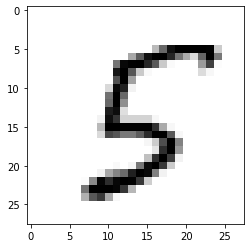

Orginal label:5
Model prediction:2


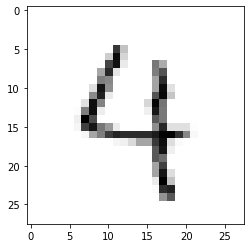

Orginal label:4
Model prediction:2


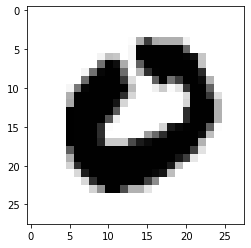

Orginal label:0
Model prediction:2


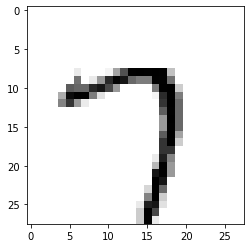

Orginal label:7
Model prediction:2


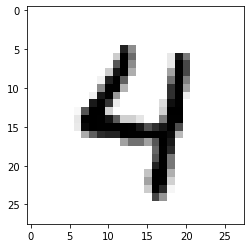

Orginal label:4
Model prediction:2


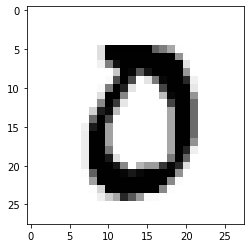

Orginal label:0
Model prediction:2


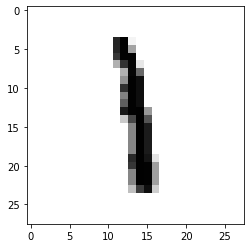

Orginal label:1
Model prediction:2


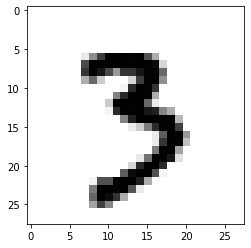

Orginal label:3
Model prediction:2


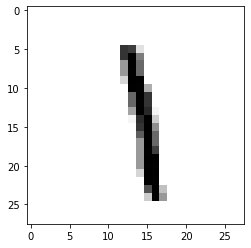

Orginal label:1
Model prediction:2


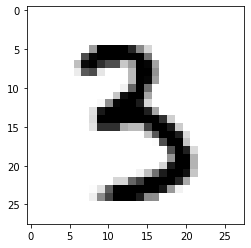

Orginal label:3
Model prediction:2


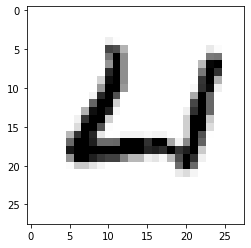

Orginal label:4
Model prediction:2


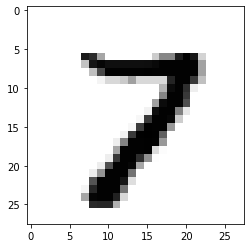

Orginal label:7
Model prediction:2


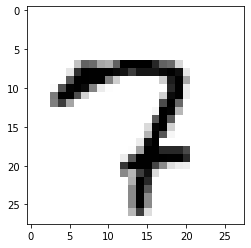

Orginal label:7
Model prediction:2


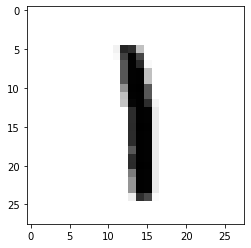

Orginal label:1
Model prediction:2


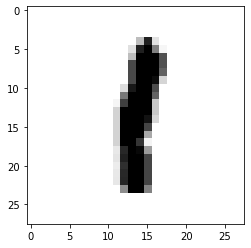

Orginal label:1
Model prediction:2


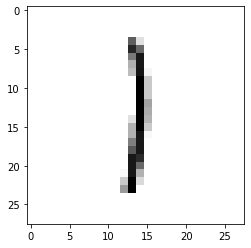

Orginal label:1
Model prediction:2


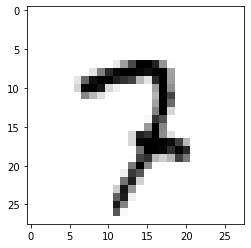

Orginal label:7
Model prediction:2


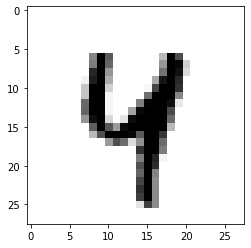

Orginal label:4
Model prediction:2


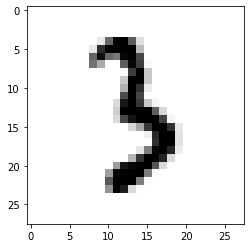

Orginal label:3
Model prediction:2


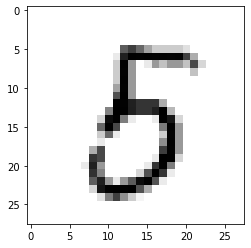

Orginal label:5
Model prediction:2


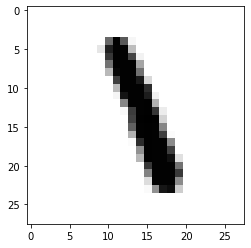

Orginal label:1
Model prediction:2


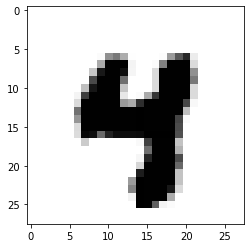

Orginal label:4
Model prediction:2


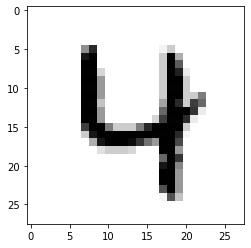

Orginal label:4
Model prediction:2


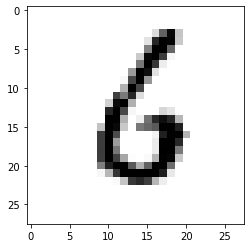

Orginal label:6
Model prediction:2


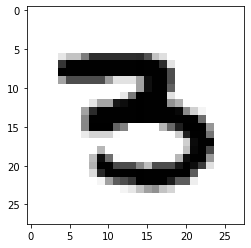

Orginal label:3
Model prediction:2


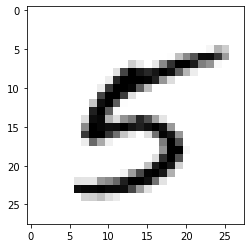

Orginal label:5
Model prediction:2


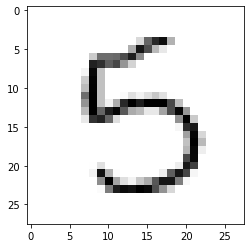

Orginal label:5
Model prediction:2


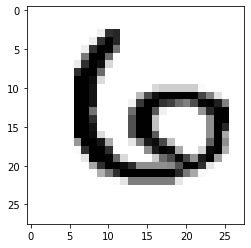

Orginal label:6
Model prediction:2


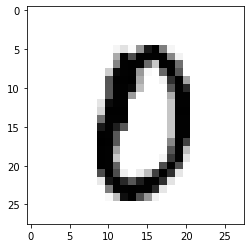

Orginal label:0
Model prediction:2


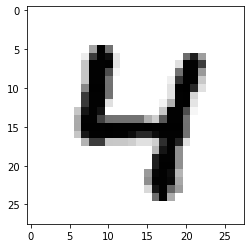

Orginal label:4
Model prediction:2


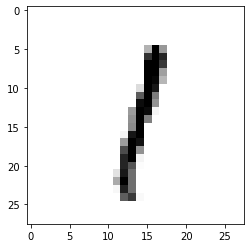

Orginal label:1
Model prediction:2


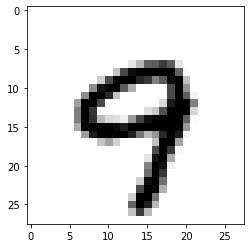

Orginal label:9
Model prediction:2


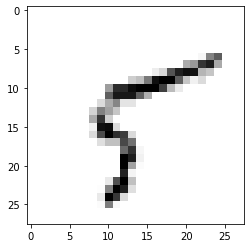

Orginal label:5
Model prediction:2


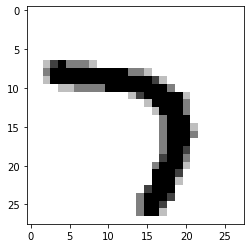

Orginal label:7
Model prediction:2


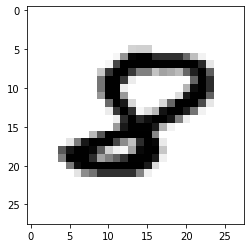

Orginal label:8
Model prediction:2


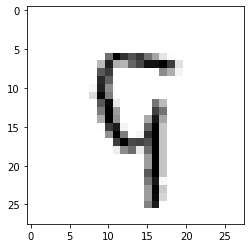

Orginal label:9
Model prediction:2


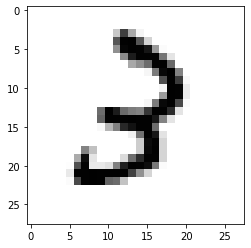

Orginal label:3
Model prediction:2


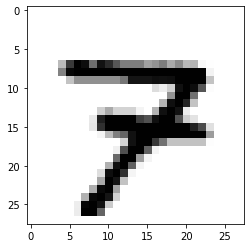

Orginal label:7
Model prediction:2


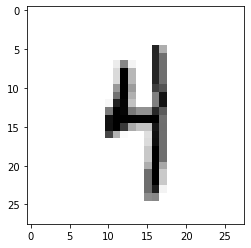

Orginal label:4
Model prediction:2


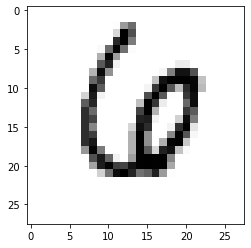

Orginal label:6
Model prediction:2


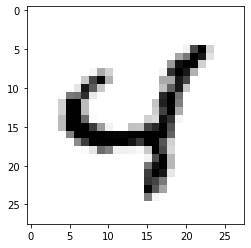

Orginal label:4
Model prediction:2


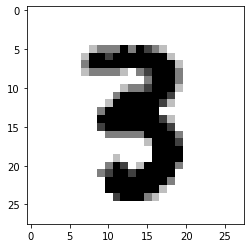

Orginal label:3
Model prediction:2


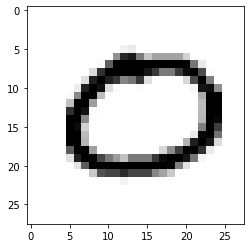

Orginal label:0
Model prediction:2


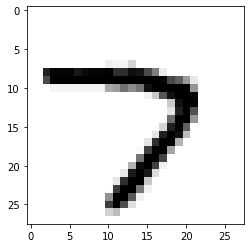

Orginal label:7
Model prediction:2


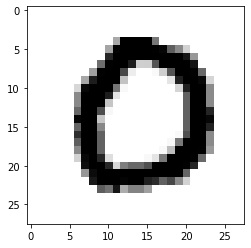

Orginal label:0
Model prediction:2


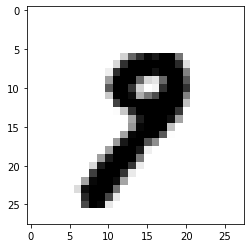

Orginal label:9
Model prediction:2


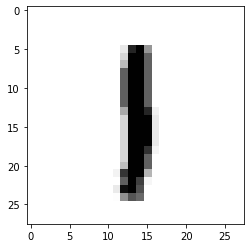

Orginal label:1
Model prediction:2


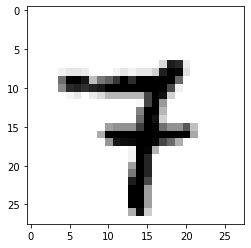

Orginal label:7
Model prediction:2


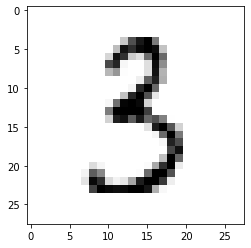

Orginal label:3
Model prediction:2


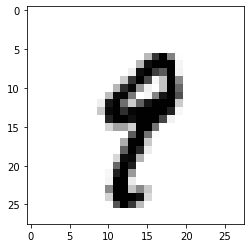

Orginal label:9
Model prediction:2


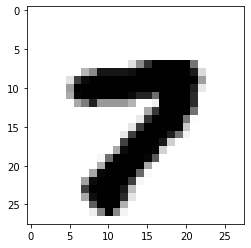

Orginal label:7
Model prediction:2


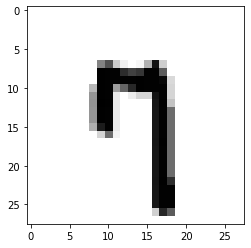

Orginal label:7
Model prediction:2


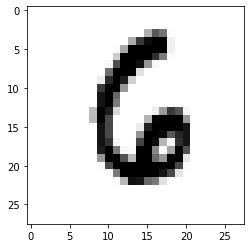

Orginal label:6
Model prediction:2


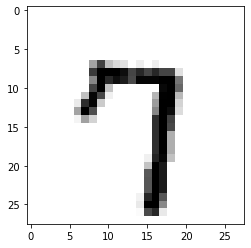

Orginal label:7
Model prediction:2


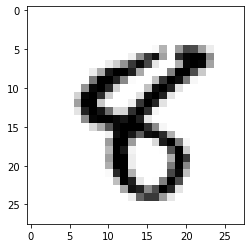

Orginal label:8
Model prediction:2


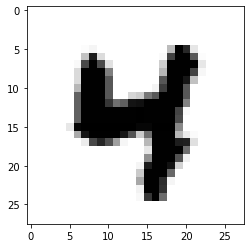

Orginal label:4
Model prediction:2


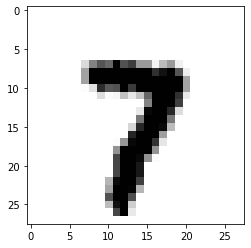

Orginal label:7
Model prediction:2


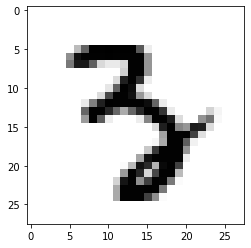

Orginal label:3
Model prediction:2


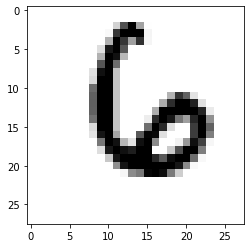

Orginal label:6
Model prediction:2


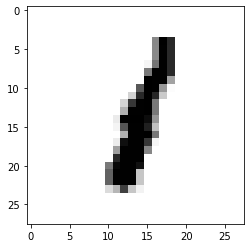

Orginal label:1
Model prediction:2


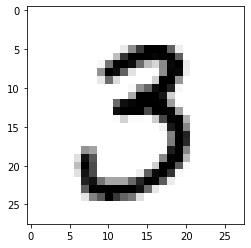

Orginal label:3
Model prediction:2


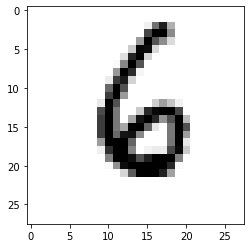

Orginal label:6
Model prediction:2


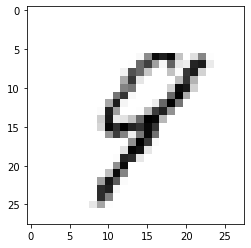

Orginal label:9
Model prediction:2


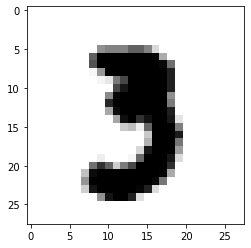

Orginal label:3
Model prediction:2


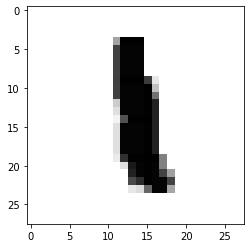

Orginal label:1
Model prediction:2


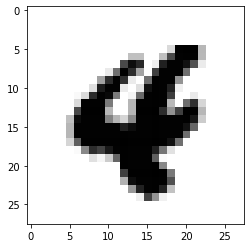

Orginal label:4
Model prediction:2


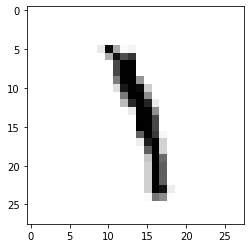

Orginal label:1
Model prediction:2


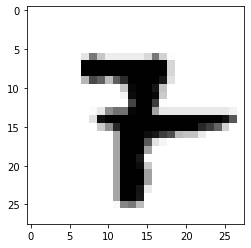

Orginal label:7
Model prediction:2


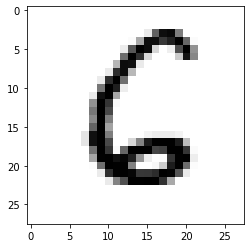

Orginal label:6
Model prediction:2


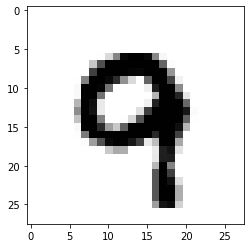

Orginal label:9
Model prediction:2


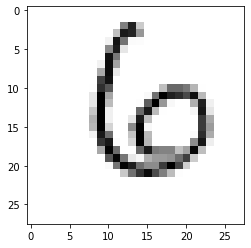

Orginal label:6
Model prediction:2


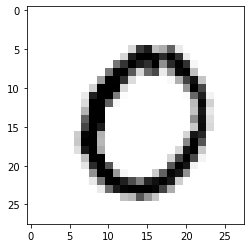

Orginal label:0
Model prediction:2


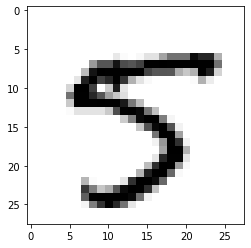

Orginal label:5
Model prediction:2


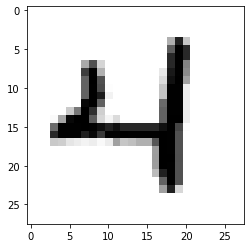

Orginal label:4
Model prediction:2


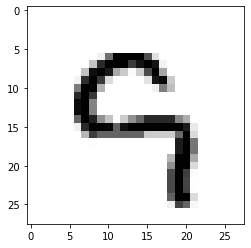

Orginal label:9
Model prediction:2


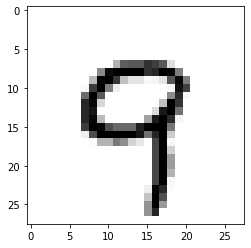

Orginal label:9
Model prediction:2


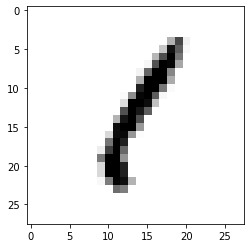

Orginal label:1
Model prediction:2


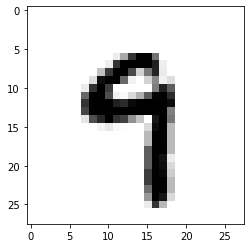

Orginal label:9
Model prediction:2


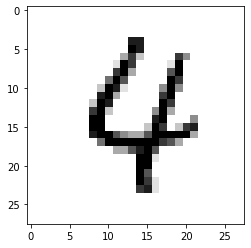

Orginal label:4
Model prediction:2


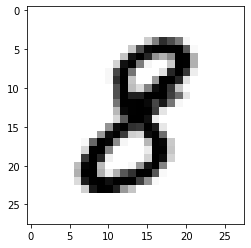

Orginal label:8
Model prediction:2


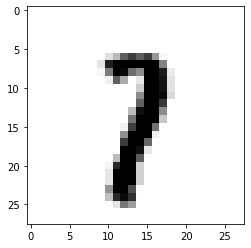

Orginal label:7
Model prediction:2


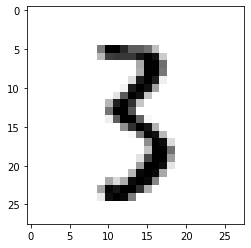

Orginal label:3
Model prediction:2


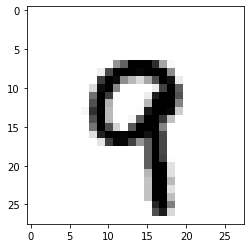

Orginal label:9
Model prediction:2


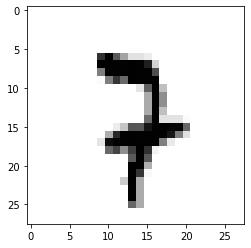

Orginal label:7
Model prediction:2


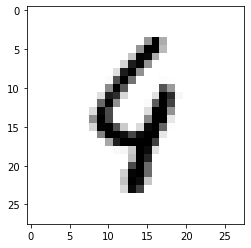

Orginal label:4
Model prediction:2


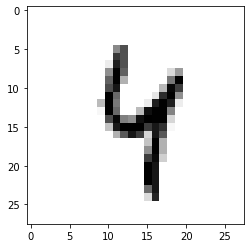

Orginal label:4
Model prediction:2


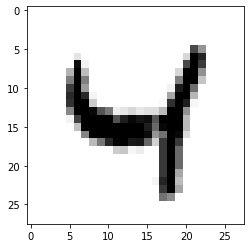

Orginal label:4
Model prediction:2


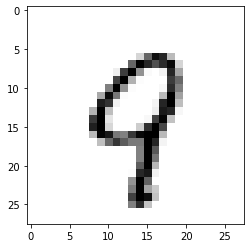

Orginal label:9
Model prediction:2


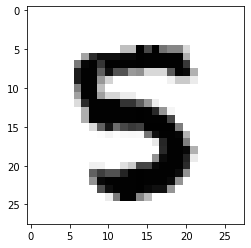

Orginal label:5
Model prediction:2


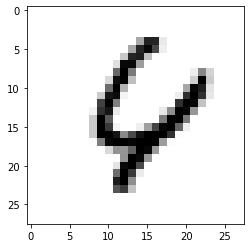

Orginal label:4
Model prediction:2


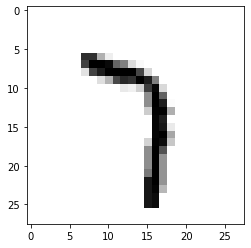

Orginal label:7
Model prediction:2


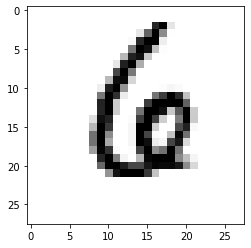

Orginal label:6
Model prediction:2


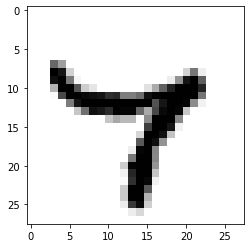

Orginal label:7
Model prediction:2


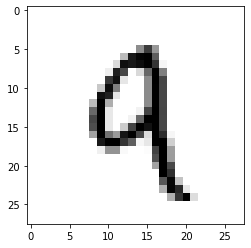

Orginal label:9
Model prediction:2


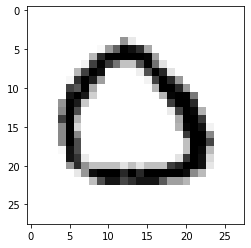

Orginal label:0
Model prediction:2


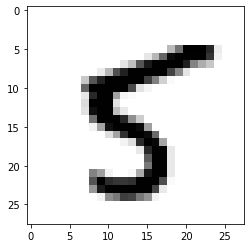

Orginal label:5
Model prediction:2


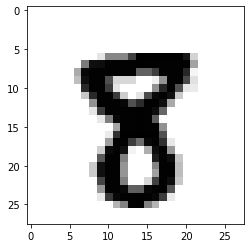

Orginal label:8
Model prediction:2


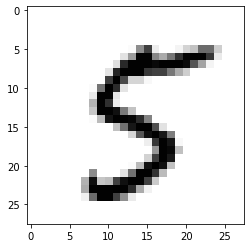

Orginal label:5
Model prediction:2


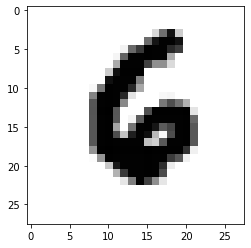

Orginal label:6
Model prediction:2


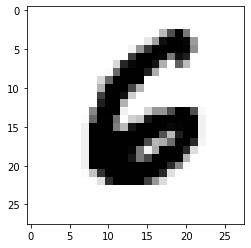

Orginal label:6
Model prediction:2


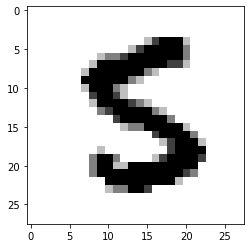

Orginal label:5
Model prediction:2


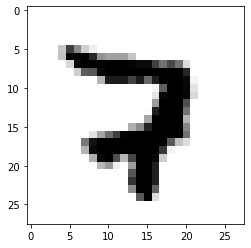

Orginal label:7
Model prediction:2


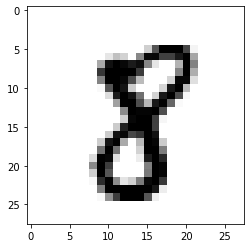

Orginal label:8
Model prediction:2


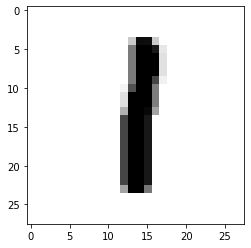

Orginal label:1
Model prediction:2


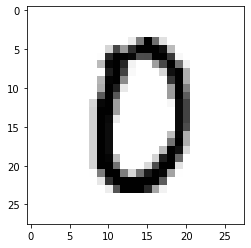

Orginal label:0
Model prediction:2


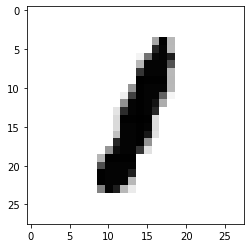

Orginal label:1
Model prediction:2


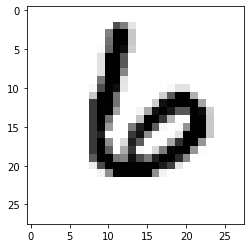

Orginal label:6
Model prediction:2


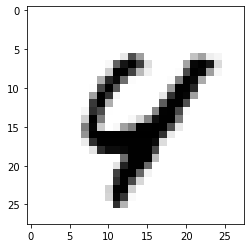

Orginal label:4
Model prediction:2


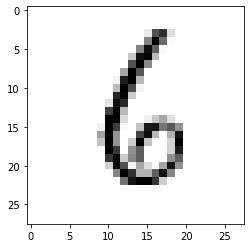

Orginal label:6
Model prediction:2


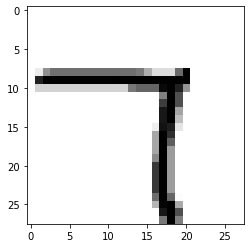

Orginal label:7
Model prediction:2


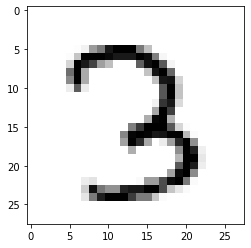

Orginal label:3
Model prediction:2


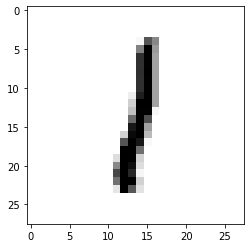

Orginal label:1
Model prediction:2


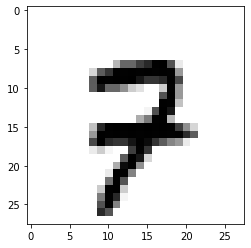

Orginal label:7
Model prediction:2


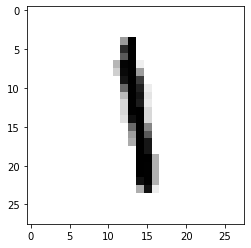

Orginal label:1
Model prediction:2


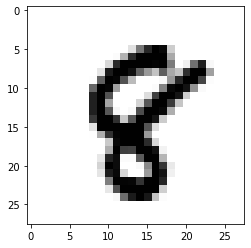

Orginal label:8
Model prediction:2


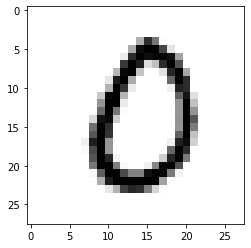

Orginal label:0
Model prediction:2


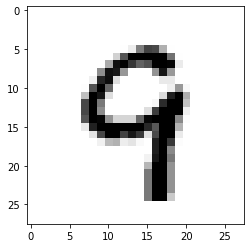

Orginal label:9
Model prediction:2


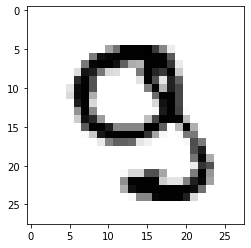

Orginal label:9
Model prediction:2


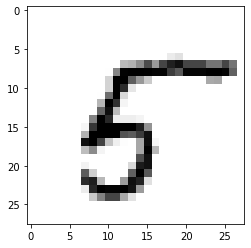

Orginal label:5
Model prediction:2


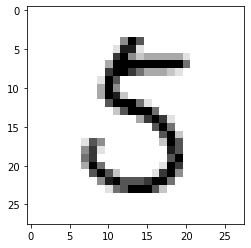

Orginal label:5
Model prediction:2


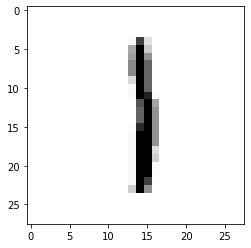

Orginal label:1
Model prediction:2


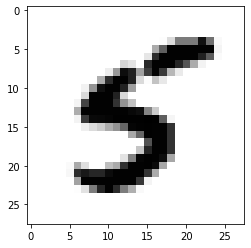

Orginal label:5
Model prediction:2


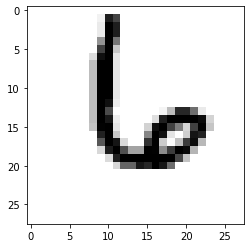

Orginal label:6
Model prediction:2


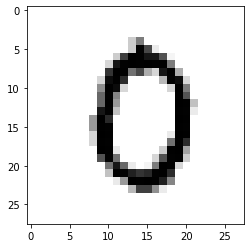

Orginal label:0
Model prediction:2


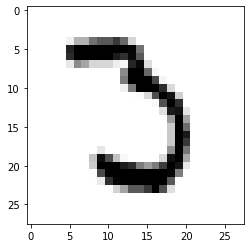

Orginal label:3
Model prediction:2


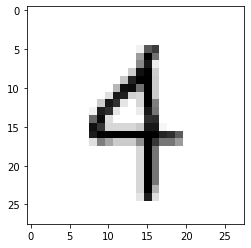

Orginal label:4
Model prediction:2


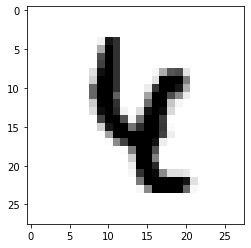

Orginal label:4
Model prediction:2


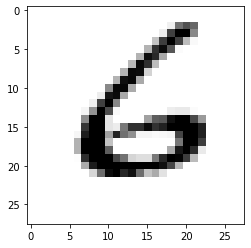

Orginal label:6
Model prediction:2


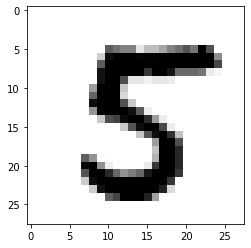

Orginal label:5
Model prediction:2


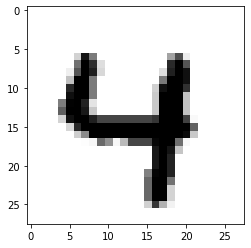

Orginal label:4
Model prediction:2


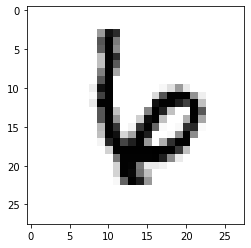

Orginal label:6
Model prediction:2


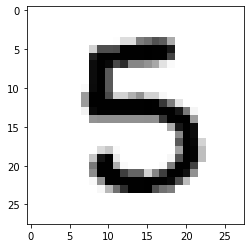

Orginal label:5
Model prediction:2


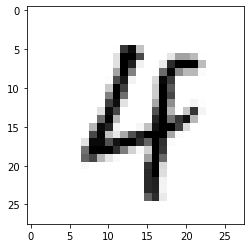

Orginal label:4
Model prediction:2


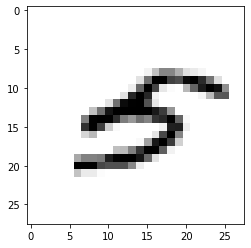

Orginal label:5
Model prediction:2


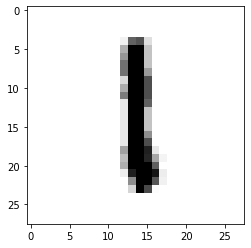

Orginal label:1
Model prediction:2


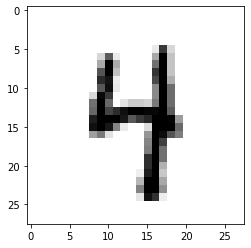

Orginal label:4
Model prediction:2


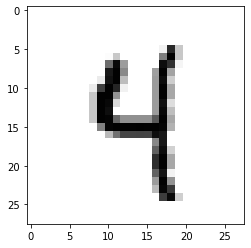

Orginal label:4
Model prediction:2


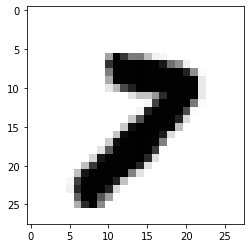

Orginal label:7
Model prediction:2


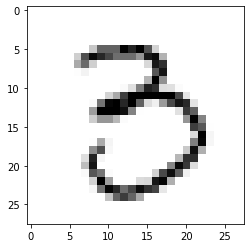

Orginal label:3
Model prediction:2


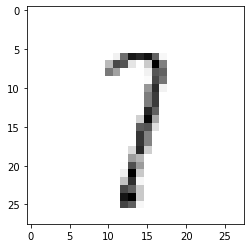

Orginal label:7
Model prediction:2


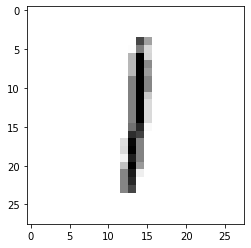

Orginal label:1
Model prediction:2


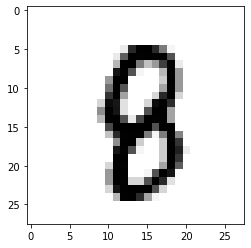

Orginal label:8
Model prediction:2


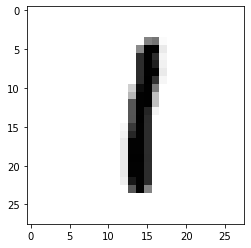

Orginal label:1
Model prediction:2


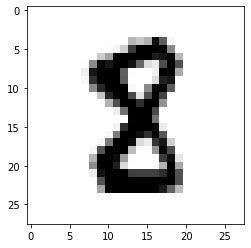

Orginal label:8
Model prediction:2


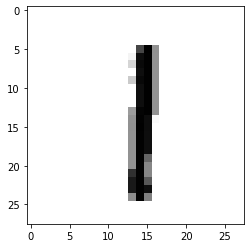

Orginal label:1
Model prediction:2


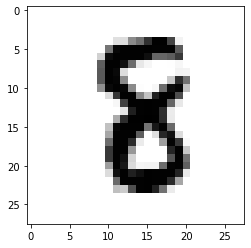

Orginal label:8
Model prediction:2


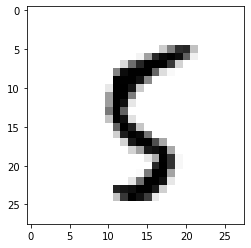

Orginal label:5
Model prediction:2


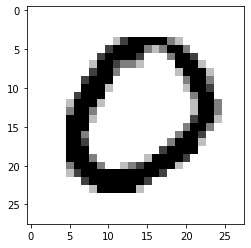

Orginal label:0
Model prediction:2


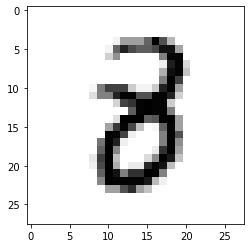

Orginal label:8
Model prediction:2


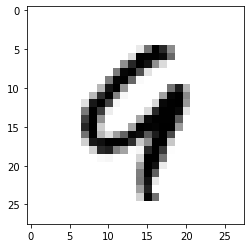

Orginal label:9
Model prediction:2


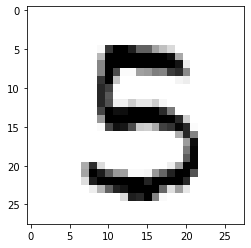

Orginal label:5
Model prediction:2


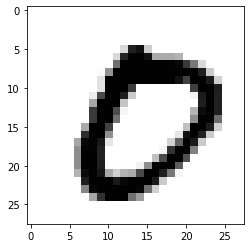

Orginal label:0
Model prediction:2


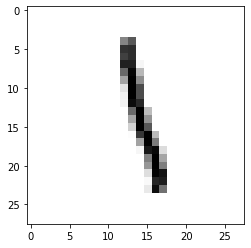

Orginal label:1
Model prediction:2


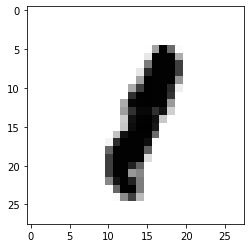

Orginal label:1
Model prediction:2


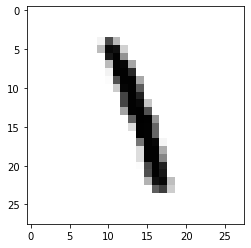

Orginal label:1
Model prediction:2


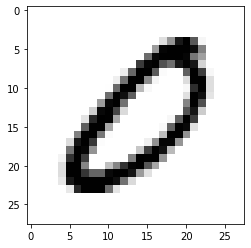

Orginal label:0
Model prediction:2


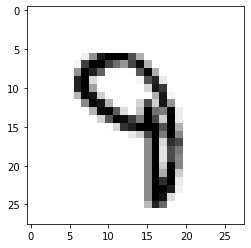

Orginal label:9
Model prediction:2


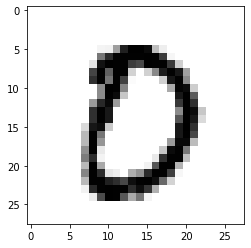

Orginal label:0
Model prediction:2


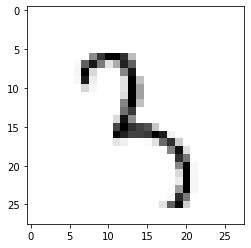

Orginal label:3
Model prediction:2


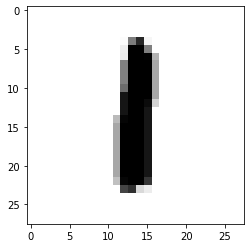

Orginal label:1
Model prediction:2


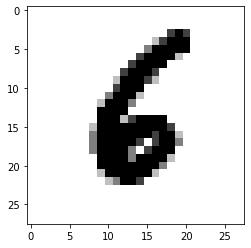

Orginal label:6
Model prediction:2


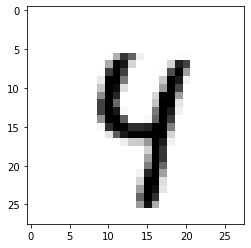

Orginal label:4
Model prediction:2


In [26]:
n_image = 200
test_image = x_test[:n_image]
test_label = y_test[:n_image]
predictions = neural_net(test_image)

for i in range(n_image):
    model_prediction = np.argmax(predictions.numpy()[1])
    if(model_predicion != test_label[i]):
        plt.imshow(np.reshape(test_image[i], [28, 28]), cmap="gray_r")
        plt.show()
        print("Orginal label:%i"%test_label[i])
        print("Model prediction:%i"%model_prediction)
    